https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Hotel Reservations.csv')

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
print('Пропуски:')
print(df.isnull().sum()[lambda x: x > 0])

df = df.dropna()

Пропуски:
Series([], dtype: int64)


In [6]:
df = df.drop('Booking_ID', axis=1)
print('Назви колонок:', list(df.columns))

print('Розмірність:', df.shape)

Назви колонок: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']
Розмірність: (36275, 18)


Кодування категоріальних змінних

In [9]:
categorical_cols = df.select_dtypes(exclude=['int', 'float']).columns

categorical_cols

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [12]:
encoded_data = ohe.fit_transform(df[categorical_cols[:-1]])

encoded_data.head()

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
df = pd.concat([df, encoded_data], axis=1).drop(columns=categorical_cols[:-1])

df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,2,3,0,5,2018,11,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,2,1,0,1,2018,2,28,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,0,0,2,0,211,2018,5,20,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,0,1,1,0,48,2018,4,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
df['booking_status'] = df['booking_status'].replace({'Not_Canceled': 0, 'Canceled': 1})

df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,2,3,0,5,2018,11,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,2,1,0,1,2018,2,28,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,0,0,2,0,211,2018,5,20,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,0,1,1,0,48,2018,4,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

Графіки

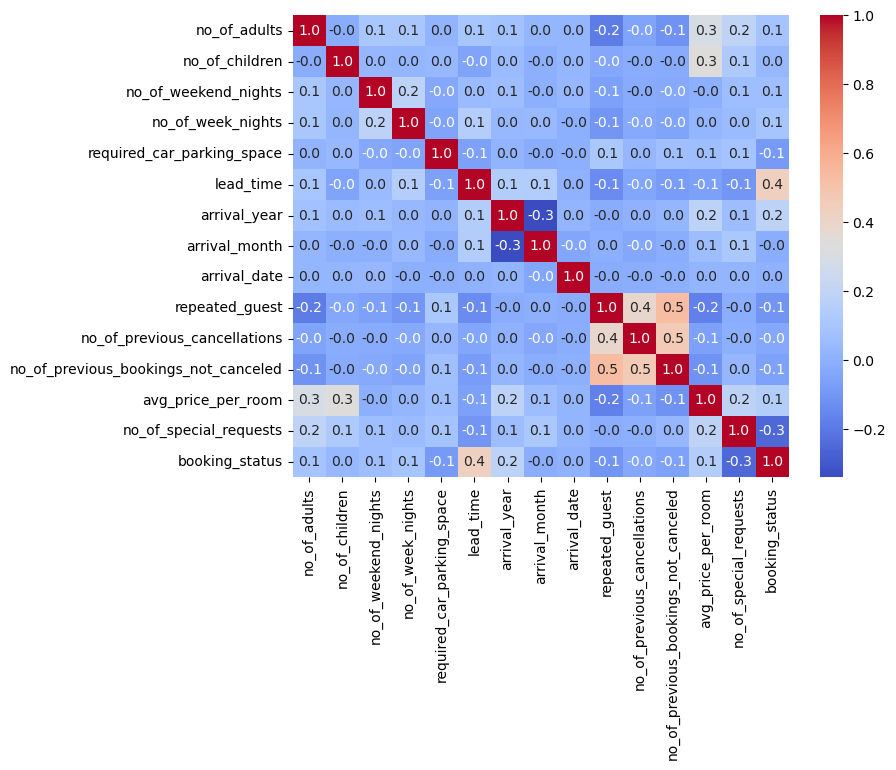

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.iloc[:, :14].columns
corr = df[numeric_cols].join(df['booking_status']).corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f')
plt.show()

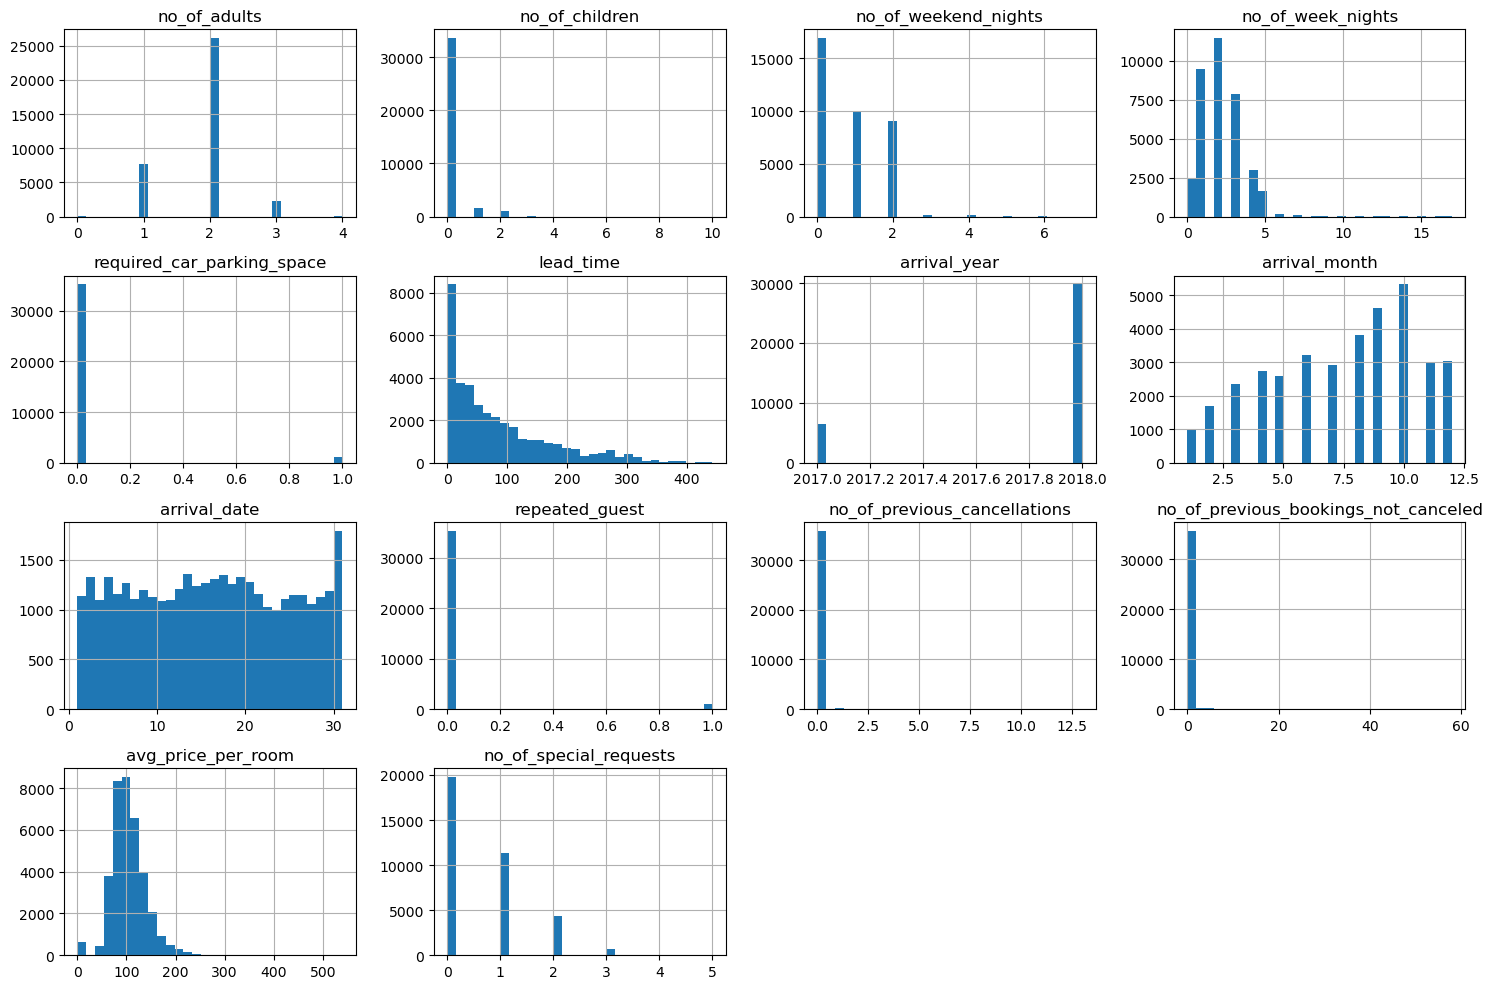

In [23]:
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

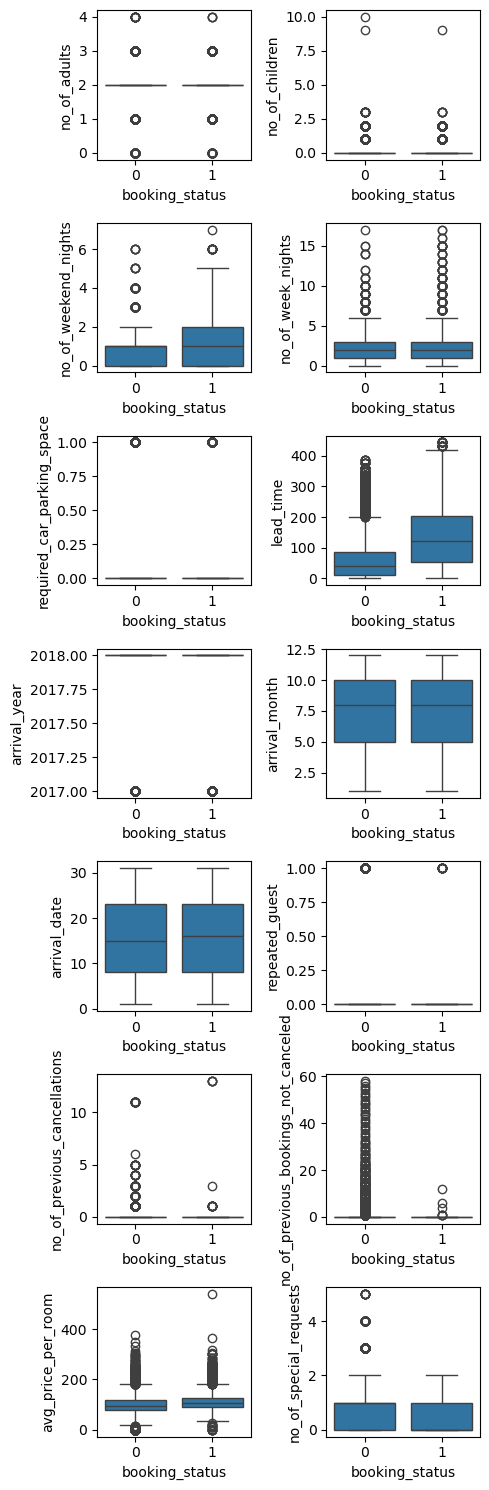

In [24]:
fig, axes = plt.subplots(7, 2, figsize=(5, 15))

axes = axes.flatten()

for i, col in enumerate(df[numeric_cols]):
    sns.boxplot(x=df['booking_status'], y=df[col], ax=axes[i])

plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.298893,-0.26147,0.217401,-0.144803,-0.178819,1.614896,-2.137469,0.839242,-1.555662,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.298893,-0.26147,1.365993,0.563972,-0.178819,-0.933701,0.467843,1.164990,-1.098013,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.628975,-0.26147,1.365993,-0.853578,-0.178819,-0.980250,0.467843,-1.766747,1.419055,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.298893,-0.26147,-0.931190,-0.144803,-0.178819,1.463610,0.467843,-0.789501,0.503757,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.298893,-0.26147,0.217401,-0.853578,-0.178819,-0.433291,0.467843,-1.115250,-0.525952,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Класифікація

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df.drop('booking_status', axis=1), df['booking_status'], test_size=0.3, random_state=0)

k_values = range(1, 11)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(score.mean())
k = np.argmax(scores) + 1

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Aaccuracy: {accuracy}')

print('Classification report:')
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Aaccuracy: 0.8490305981806487
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7309
           1       0.78      0.75      0.77      3574

    accuracy                           0.85     10883
   macro avg       0.83      0.82      0.83     10883
weighted avg       0.85      0.85      0.85     10883

Confusion matrix:
[[6554  755]
 [ 888 2686]]


In [30]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Aaccuracy: {accuracy}')

print('Classification report:')
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Aaccuracy: 0.868878066709547
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7309
           1       0.80      0.80      0.80      3574

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883

Confusion matrix:
[[6587  722]
 [ 705 2869]]


In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# тут дуже довго опрацьовувався фрагмент, тому так мало значень для гіперпараметрів
param_grid = {
    'C': [0.1, 1],
    'gamma': [0.01, 0.1]
}

svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'C': 1, 'gamma': 0.1}
Best cross-validation score: 0.8498741157920685


In [48]:
svm = SVC(kernel='rbf', gamma=0.1, C=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Aaccuracy: {accuracy}')

print('Classification report:')
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Aaccuracy: 0.853073601029128
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7309
           1       0.82      0.71      0.76      3574

    accuracy                           0.85     10883
   macro avg       0.84      0.82      0.83     10883
weighted avg       0.85      0.85      0.85     10883

Confusion matrix:
[[6747  562]
 [1037 2537]]


In [35]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Aaccuracy: {accuracy}')

print('Classification report:')
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Aaccuracy: 0.8997519066433888
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      7309
           1       0.89      0.80      0.84      3574

    accuracy                           0.90     10883
   macro avg       0.90      0.87      0.88     10883
weighted avg       0.90      0.90      0.90     10883

Confusion matrix:
[[6948  361]
 [ 730 2844]]


In [36]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Aaccuracy: {accuracy}')

print('Classification report:')
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Aaccuracy: 0.8173297803914362
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      7309
           1       0.74      0.68      0.71      3574

    accuracy                           0.82     10883
   macro avg       0.80      0.78      0.79     10883
weighted avg       0.81      0.82      0.81     10883

Confusion matrix:
[[6477  832]
 [1156 2418]]
